In [8]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gmaps

# Google developer API key

from config import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)


Importing the csv file

In [15]:
# Reference the file where the CSV is located
crime_csv_path = "Crimes_-_2001_to_present.csv"

# Import the data into a Pandas DataFrame
crimes_data_df = pd.read_csv(crime_csv_path)
crimes_data_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10000092,HY189866,3/18/15 19:44,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,...,28.0,25.0,04B,1144606.0,1903566.0,2015,2/10/18 15:50,41.891399,-87.744385,"(41.891398861, -87.744384567)"
1,10000094,HY190059,3/18/15 23:00,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,...,15.0,67.0,26,1166468.0,1860715.0,2015,2/10/18 15:50,41.773372,-87.665319,"(41.773371528, -87.665319468)"
2,10000095,HY190052,3/18/15 22:45,044XX S LAKE PARK AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,4.0,39.0,08B,1185075.0,1875622.0,2015,2/10/18 15:50,41.813861,-87.596643,"(41.81386068, -87.596642837)"
3,10000096,HY190054,3/18/15 22:30,051XX S MICHIGAN AVE,460,BATTERY,SIMPLE,APARTMENT,False,False,...,3.0,40.0,08B,1178033.0,1870804.0,2015,2/10/18 15:50,41.800802,-87.622619,"(41.800802415, -87.622619343)"
4,10000097,HY189976,3/18/15 21:00,047XX W ADAMS ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,False,False,...,28.0,25.0,3,1144920.0,1898709.0,2015,2/10/18 15:50,41.878065,-87.743354,"(41.878064761, -87.743354013)"


combine similar crimes into manageable categories

In [16]:
# Combining similar offenses together
crimes_data_df["Primary Type"] = crimes_data_df["Primary Type"].replace(
   {"THEFT": "THEFT & ROBBERY", "BURGLARY": "THEFT & ROBBERY", "MOTOR VEHICLE THEFT": "THEFT & ROBBERY",
    "ROBBERY": "THEFT & ROBBERY", "BATTERY": "ASSAULT", "CRIM SEXUAL ASSAULT": "ASSAULT", "PROSTITUTION": "SEX CRIMES",
    "SEX OFFENSE": "SEX CRIMES", "CRIMINAL TRESPASS": "CRIMINAL DAMAGE", "ARSON": "CRIMINAL DAMAGE", "OTHER OFFENSE":
    "OTHER OFFENSES", "GAMBLING":"OTHER OFFENSES", "STALKING": "OTHER OFFENSES", "KIDNAPPING": "OTHER OFFENSES", "OBSCENITY": "OTHER OFFENSES",
    "INTIMIDATION": "OTHER OFFENSES", "RITUALISM": "OTHER OFFENSES", "HUMAN TRAFFICKING": "OTHER OFFENSES",
    "CONCEALED CARRY LICENSE VIOLATION": "OTHER OFFENSES", "NON-CRIMINAL (SUBJECT SPECIFIED)": "OTHER OFFENSES",
    "NON-CRIMINAL": "OTHER OFFENSES", "OFFENSE INVOLVING CHILDREN":
    "OTHER OFFENSES", "INTERFERENCE WITH PUBLIC OFFICER": "OTHER OFFENSES","PUBLIC PEACE VIOLATION": "OTHER OFFENSES", "LIQUOR LAW VIOLATION": "OTHER OFFENSES",
    "NON - CRIMINAL": "OTHER OFFENSES", "OTHER NARCOTIC VIOLATION": "NARCOTICS", "PUBLIC INDECENCY": "OTHER OFFENSES", "DOMESTIC VIOLENCE": "OTHER OFFENSES", "WEAPONS VIOLATION": "OTHER OFFENSES", "HOMICIDE": "OTHER OFFENSES"})

In [17]:
# look for missing values
crimes_data_df.count()

ID                      1048575
Case Number             1048574
Date                    1048575
Block                   1048575
IUCR                    1048575
Primary Type            1048575
Description             1048575
Location Description    1046890
Arrest                  1048575
Domestic                1048575
Beat                    1048575
District                1048574
Ward                    1017431
Community Area          1017311
FBI Code                1048575
X Coordinate            1020212
Y Coordinate            1020212
Year                    1048575
Updated On              1048575
Latitude                1020212
Longitude               1020212
Location                1020212
dtype: int64

Drop values with null values

In [18]:
# drop null rows
crimes_data_df = crimes_data_df.dropna(how='any')
crimes_data_df.count()

ID                      991067
Case Number             991067
Date                    991067
Block                   991067
IUCR                    991067
Primary Type            991067
Description             991067
Location Description    991067
Arrest                  991067
Domestic                991067
Beat                    991067
District                991067
Ward                    991067
Community Area          991067
FBI Code                991067
X Coordinate            991067
Y Coordinate            991067
Year                    991067
Updated On              991067
Latitude                991067
Longitude               991067
Location                991067
dtype: int64

check which crime category is dominant in the city

In [19]:
#Number of Unique Crimes

crimes_count = crimes_data_df.groupby('Primary Type')['ID'].nunique()
crimes_count_df = pd.DataFrame(crimes_count)


#Rename:
crimes_analysis_df = crimes_count_df.rename(columns={"ID": "Number of Crimes"})

crimes_analysis_df

,Number of Crimes
Primary Type,
ASSAULT,264523
CRIMINAL DAMAGE,141268
DECEPTIVE PRACTICE,50591
NARCOTICS,65386
OTHER OFFENSES,101493
SEX CRIMES,8747
THEFT & ROBBERY,359059


visualize the data through bar-chart

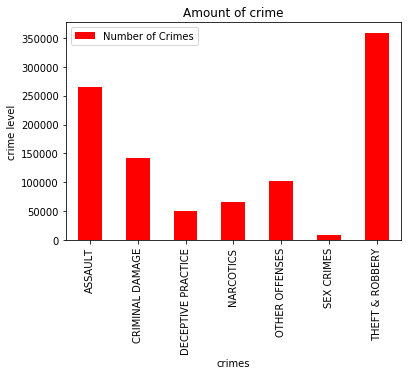

In [20]:
crimes_analysis_df.plot(kind="bar", facecolor="red")

plt.title("Amount of crime")
plt.ylabel("crime level")
plt.xlabel("crimes")
plt.savefig("Images/chartsConfig.png")

In [21]:
#dataframe with only 2016-2017:

crime_df=crimes_data_df.loc[crimes_data_df['Year'].isin(['2016','2017'])]


create a table to visualize the different categories of crimes 

In [22]:

sex_crimes=crimes_data_df.loc[crimes_data_df["Primary Type"]=="SEX CRIMES" , :]
criminal_damage=crimes_data_df.loc[crimes_data_df["Primary Type"]=="CRIMINAL DAMAGE" , :]
deceptive_practice_count=crimes_data_df.loc[crimes_data_df["Primary Type"]=="DECEPTIVE PRACTICE" , :]
narcotics_practice_count=crimes_data_df.loc[crimes_data_df["Primary Type"]=="NARCOTICS" , :]
otheroffences_count=crimes_data_df.loc[crimes_data_df["Primary Type"]=="OTHER OFFENSES" , :]
theftrobbery_df=crimes_data_df.loc[crimes_data_df["Primary Type"]=="THEFT & ROBBERY" , :]
assualts_df=crimes_data_df.loc[crimes_data_df["Primary Type"]=="ASSAULT" , :]


sex_crimes_count=sex_crimes['Year'].value_counts()
criminal_damage_count=criminal_damage['Year'].value_counts()
deceptive_practice=deceptive_practice_count['Year'].value_counts()
narcotics_practice=narcotics_practice_count['Year'].value_counts()
otheroffences=otheroffences_count['Year'].value_counts()
theftrobbery=theftrobbery_df['Year'].value_counts()
assualts_df=assualts_df['Year'].value_counts()

df=pd.DataFrame({"sex_crimes_count":sex_crimes_count,"criminal_damage_count":criminal_damage_count,
                 "deceptive_practice":deceptive_practice,"narcotics_practice":narcotics_practice,
                 "otheroffences":otheroffences,
                "theftrobbery":theftrobbery,"assualts_df":assualts_df})
df=df.reset_index()

In [23]:
df=df.dropna(how="any")

df

,index,sex_crimes_count,criminal_damage_count,deceptive_practice,narcotics_practice,otheroffences,theftrobbery,assualts_df
1,2002,1274.0,10760.0,2190.0,7555.0,7028.0,26715,20616.0
2,2003,1744.0,15321.0,2672.0,11709.0,9526.0,35597,25626.0
3,2004,84.0,1323.0,225.0,435.0,941.0,2976,2282.0
7,2008,21.0,217.0,40.0,169.0,263.0,434,322.0
8,2009,360.0,3887.0,858.0,2937.0,2793.0,8227,6190.0
13,2014,30.0,21.0,444.0,13.0,132.0,200,71.0
14,2015,1588.0,27666.0,10792.0,15488.0,20855.0,69777,51600.0
15,2016,1478.0,34969.0,13166.0,11780.0,23467.0,89288,64495.0
16,2017,1323.0,30003.0,12024.0,9238.0,21933.0,81226,58267.0
17,2018,814.0,17096.0,8143.0,6055.0,14205.0,44341,34920.0


create a line graph comparing different categories of the crimes

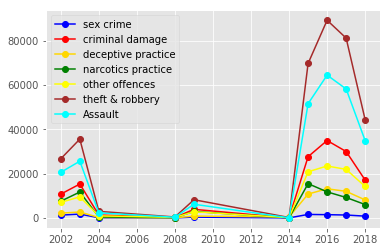

In [24]:
plt.style.use("ggplot")

sex_crimes=plt.plot(df["index"],df["sex_crimes_count"],marker="o",color="blue",label="sex crime")
criminal_damages=plt.plot(df["index"],df["criminal_damage_count"],marker="o",color="red",label="criminal damage")
deceptive_practices=plt.plot(df["index"],df["deceptive_practice"],marker="o",color="gold",label="deceptive practice")
narcotics_practices=plt.plot(df["index"],df["narcotics_practice"],marker="o",color="green",label="narcotics practice")
otheroffencess=plt.plot(df["index"],df["otheroffences"],marker="o",color="yellow",label="other offences")
theftandrobbery_df=plt.plot(df["index"],df["theftrobbery"],marker="o",color="brown",label="theft & robbery")
assualts_df=plt.plot(df["index"],df["assualts_df"],marker="o",color="cyan",label="Assault")
plt.legend(loc="best")
plt
plt.savefig("Images/chartsConfig.png")

Above: the trend of other crimes in the area

In [25]:
crime_in_ward42=crimes_data_df.loc[crimes_data_df["Ward"]==42,:]
crimes_in_ward42=crime_in_ward42["Primary Type"].value_counts()

crimes_in_ward42_df=pd.DataFrame(crimes_in_ward42)
crimes_in_ward42_df=crimes_in_ward42_df.reset_index()

crimes_in_ward42_df


,index,Primary Type
0,THEFT & ROBBERY,31150
1,DECEPTIVE PRACTICE,7328
2,ASSAULT,7288
3,CRIMINAL DAMAGE,3939
4,OTHER OFFENSES,2268
5,NARCOTICS,515
6,SEX CRIMES,363


In [26]:
crime_type=pd.Series(crimes_in_ward42_df["index"])
crime_amount=pd.Series(crimes_in_ward42_df["Primary Type"])
colors = ["red","lightskyblue","lightcoral","green","brown","gold","blue"]


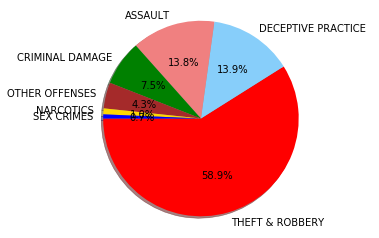

In [27]:
plt.pie(crime_amount, labels=crime_type,   colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.axis("equal")
plt.savefig("Images/chartsConfig.png")


In [28]:
#choose Theft and Robbery and uniqly categorize location description
theft_crime_df = crimes_data_df.loc[crimes_data_df["Primary Type"] == "THEFT & ROBBERY", :]
theft_crime_df['Location Description'].unique()



array(['SIDEWALK', 'GAS STATION', 'APARTMENT', 'OTHER',
       'GROCERY FOOD STORE', 'BAR OR TAVERN', 'CTA BUS STOP', 'STREET',
       'RESIDENCE-GARAGE', 'RESIDENCE PORCH/HALLWAY', 'RESIDENCE',
       'PARKING LOT/GARAGE(NON.RESID.)', 'NURSING HOME/RETIREMENT HOME',
       'VACANT LOT/LAND', 'RESTAURANT', 'DRUG STORE',
       'CHURCH/SYNAGOGUE/PLACE OF WORSHIP', 'HOTEL/MOTEL',
       'MEDICAL/DENTAL OFFICE', 'SMALL RETAIL STORE',
       'SCHOOL, PRIVATE, BUILDING', 'CTA BUS',
       'RESIDENTIAL YARD (FRONT/BACK)', 'ALLEY', 'DAY CARE CENTER',
       'CAR WASH', 'SCHOOL, PUBLIC, BUILDING', 'TAVERN/LIQUOR STORE',
       'TAXICAB', 'DEPARTMENT STORE', 'PARK PROPERTY',
       'VEHICLE-COMMERCIAL', 'ATHLETIC CLUB', 'VEHICLE NON-COMMERCIAL',
       'FACTORY/MANUFACTURING BUILDING', 'CLEANING STORE',
       'CTA GARAGE / OTHER PROPERTY', 'DRIVEWAY - RESIDENTIAL',
       'AIRPORT TERMINAL UPPER LEVEL - SECURE AREA',
       'AIRPORT TERMINAL LOWER LEVEL - SECURE AREA', 'BANK',
       'GOVERNME

# classifying crime location by city zoning

In [29]:
# clean the data on location description#

theft_crimes_location_df = theft_crime_df['Location Description'].replace(
       {'SIDEWALK':'PUBLIC',  'GAS STATION':'COMMERCIAL', 'APARTMENT':'RESIDENTIAL','OTHER':'OTHER' ,
       'GROCERY FOOD STORE': 'COMMERCIAL','BAR OR TAVERN':'RECREATIONAL','CTA BUS STOP':'PUBLIC', 'STREET':'PUBLIC',
       'RESIDENCE-GARAGE':'RESIDENTIAL','RESIDENCE PORCH/HALLWAY':'RESIDENTIAL', 'RESIDENCE':'RESIDENTIAL',
       'PARKING LOT/GARAGE(NON.RESID.)':'COMMERCIAL' , 'NURSING HOME/RETIREMENT HOME':'RESIDENTIAL',
       'VACANT LOT/LAND': 'PUBLIC', 'RESTAURANT':'RECREATIONAL',   'DRUG STORE': 'COMMERCIAL',
       'CHURCH/SYNAGOGUE/PLACE OF WORSHIP':'COMMERCIAL' , 'HOTEL/MOTEL':'RECREATIONAL',
       'MEDICAL/DENTAL OFFICE': 'COMMERCIAL', 'SMALL RETAIL STORE':'COMMERCIAL',
       'SCHOOL, PRIVATE, BUILDING':'HOSP&EDU',   'CTA BUS':  'COMMERCIAL',
       'RESIDENTIAL YARD (FRONT/BACK)':'RESIDENTIAL','ALLEY': 'PUBLIC',     'DAY CARE CENTER':'RESIDENTIAL',
       'CAR WASH': 'COMMERCIAL', 'SCHOOL, PUBLIC, BUILDING':'HOSP&EDU'  , 'TAVERN/LIQUOR STORE' : 'COMMERCIAL',
       'TAXICAB':  'OTHER',    'DEPARTMENT STORE':'COMMERCIAL' , 'PARK PROPERTY': 'PUBLIC',
       'VEHICLE-COMMERCIAL': 'OTHER'  ,'ATHLETIC CLUB':   'COMMERCIAL' ,  'VEHICLE NON-COMMERCIAL': 'OTHER',
       'FACTORY/MANUFACTURING BUILDING': 'OTHER',  'CLEANING STORE':'COMMERCIAL',
       'CTA GARAGE / OTHER PROPERTY': 'PUBLIC','DRIVEWAY - RESIDENTIAL':'RESIDENTIAL',
       'AIRPORT TERMINAL UPPER LEVEL - SECURE AREA':'OTHER',
       'AIRPORT TERMINAL LOWER LEVEL - SECURE AREA': 'OTHER',  'BANK': 'COMMERCIAL',
       'GOVERNMENT BUILDING/PROPERTY' : 'PUBLIC', 'CONSTRUCTION SITE': 'OTHER', 'CTA STATION': 'COMMERCIAL',
       'CURRENCY EXCHANGE': 'OTHER', 'COLLEGE/UNIVERSITY RESIDENCE HALL':'HOSP&EDU',
       'CTA TRAIN': 'OTHER' ,  'COLLEGE/UNIVERSITY GROUNDS':'HOSP&EDU',
       'AIRPORT VENDING ESTABLISHMENT': 'OTHER',
       'AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA':'PUBLIC', 'CTA PLATFORM':'COMMERCIAL',
       'HOSPITAL BUILDING/GROUNDS':'HOSP&EDU',  'CONVENIENCE STORE': 'COMMERCIAL',
       'SPORTS ARENA/STADIUM': 'PUBLIC', 'CHA APARTMENT':'RESIDENTIAL',
       'COMMERCIAL / BUSINESS OFFICE':  'COMMERCIAL',    
       'AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA': 'PUBLIC', 'LIBRARY': 'PUBLIC',
       'BARBERSHOP':'COMMERCIAL','SCHOOL, PUBLIC, GROUNDS':'HOSP&EDU',
       'AIRPORT BUILDING NON-TERMINAL - SECURE AREA': 'PUBLIC', 'WAREHOUSE':'COMMERCIAL',
       'ABANDONED BUILDING':   'PUBLIC','BOWLING ALLEY': 'PUBLIC',
       'OTHER RAILROAD PROP / TRAIN DEPOT' : 'OTHER', 'ANIMAL HOSPITAL':'HOSP&EDU',
       'PAWN SHOP': 'COMMERCIAL',   'MOVIE HOUSE/THEATER': 'COMMERCIAL','BOAT/WATERCRAFT':  'OTHER',
       'SCHOOL, PRIVATE, GROUNDS':'HOSP&EDU',   'AIRPORT EXTERIOR - NON-SECURE AREA':'PUBLIC',
       'ATM (AUTOMATIC TELLER MACHINE)':'OTHER',
       'POLICE FACILITY/VEH PARKING LOT':'OTHER'  , 'VEHICLE - DELIVERY TRUCK': 'OTHER',
       'OTHER COMMERCIAL TRANSPORTATION':'OTHER', 'AIRPORT PARKING LOT':  'PUBLIC',
       'CHA HALLWAY/STAIRWELL/ELEVATOR':  'PUBLIC', 'CEMETARY': 'PUBLIC',
       'JAIL / LOCK-UP FACILITY': 'OTHER',   'BRIDGE': 'OTHER',  'APPLIANCE STORE': 'COMMERCIAL',
       'CHA PARKING LOT/GROUNDS': 'PUBLIC', 'AIRCRAFT': 'OTHER',
       'AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA':  'PUBLIC',
       'AIRPORT/AIRCRAFT': 'OTHER',     'FIRE STATION':  'OTHER',
       'AIRPORT EXTERIOR - SECURE AREA':'PUBLIC',
       'AIRPORT TRANSPORTATION SYSTEM (ATS)': 'OTHER',
       'LAKEFRONT/WATERFRONT/RIVERBANK':'PUBLIC', 'CTA TRACKS - RIGHT OF WAY':'PUBLIC',
       'NEWSSTAND': 'PUBLIC',   'VEHICLE - OTHER RIDE SERVICE': 'OTHER',  'FOREST PRESERVE': 'RECREATIONAL',
       'POOL ROOM':'RECREATIONAL', 'HIGHWAY/EXPRESSWAY': 'OTHER',  'COIN OPERATED MACHINE':  'OTHER',
       'FEDERAL BUILDING': 'PUBLIC', 'CREDIT UNION': 'OTHER', 'SAVINGS AND LOAN': 'OTHER',
       'AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA':'PUBLIC', 'nan':'OTHER',
         'AUTO / BOAT / RV DEALERSHIP':  'COMMERCIAL',
       'VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)':'OTHER',
         'DELIVERY TRUCK': 'OTHER', 'FARM':'OTHER' })

In [30]:
# The location of crimes are categorized according to chicago zone codes
theft_crimes_location_df.unique()

array(['PUBLIC', 'COMMERCIAL', 'RESIDENTIAL', 'OTHER', 'RECREATIONAL',
       'HOSP&EDU'], dtype=object)

In [31]:
theft_df=pd.DataFrame(theft_crimes_location_df)
#theft_df=theft_df.rename(columns={"ID": "Number of Crimes"})
thefts_df=theft_df['Location Description'].value_counts()



thefts_by_location_df=pd.DataFrame(thefts_df)
thefts_by_location_df=thefts_by_location_df.reset_index()
thefts_by_location_df


,index,Location Description
0,PUBLIC,138446
1,RESIDENTIAL,92476
2,COMMERCIAL,75837
3,OTHER,30199
4,RECREATIONAL,16177
5,HOSP&EDU,5924


In [32]:
theft_location=pd.Series(thefts_by_location_df["index"])
thefts_location_amount=pd.Series(thefts_by_location_df["Location Description"])
colors = ["red","lightskyblue","lightcoral","green","cyan","gold"]

In [33]:
theft_location=pd.Series(thefts_by_location_df["index"])
thefts_location_amount=pd.Series(thefts_by_location_df["Location Description"])
colors = ["red","lightskyblue","lightcoral","green","cyan","gold"]

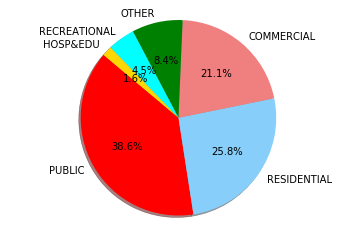

In [34]:
plt.pie(thefts_location_amount, labels=theft_location, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.savefig("Images/chartsConfig.png")

In [35]:
theft_df=pd.DataFrame(theft_crimes_location_df)

thefts_df=theft_df['Location Description'].value_counts()



thefts_by_location_df=pd.DataFrame(thefts_df)
#thefts_by_location_df=thefts_by_location_df.reset_index()


thefts_by_location_df = thefts_by_location_df.rename(columns={"ID": "Number of Crimes"})
thefts_by_location_df

,Location Description
PUBLIC,138446
RESIDENTIAL,92476
COMMERCIAL,75837
OTHER,30199
RECREATIONAL,16177
HOSP&EDU,5924


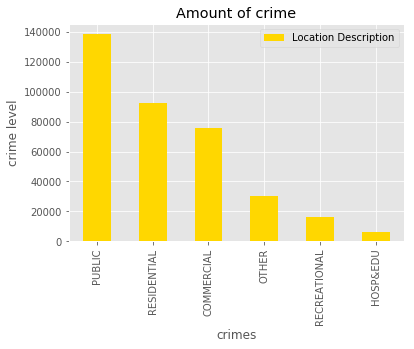

In [36]:
thefts_by_location_df.plot(kind="bar", facecolor="gold")

plt.title("Amount of crime")
plt.ylabel("crime level")
plt.xlabel("crimes")
plt.savefig("Images/chartsConfig.png")

# check if city zones have any effect on crimes

In [37]:
# Combining similar offenses together
crimes_data_df["Primary Type"] = crimes_data_df["Primary Type"].replace(
   {"THEFT": "THEFT & ROBBERY", "BURGLARY": "THEFT & ROBBERY", "MOTOR VEHICLE THEFT": "THEFT & ROBBERY",
    "ROBBERY": "THEFT & ROBBERY", "BATTERY": "ASSAULT", "CRIM SEXUAL ASSAULT": "ASSAULT", "PROSTITUTION": "SEX CRIMES",
    "SEX OFFENSE": "SEX CRIMES", "CRIMINAL TRESPASS": "CRIMINAL DAMAGE", "ARSON": "CRIMINAL DAMAGE", "OTHER OFFENSE":
    "OTHER OFFENSES", "GAMBLING":"OTHER OFFENSES", "STALKING": "OTHER OFFENSES", "KIDNAPPING": "OTHER OFFENSES", "OBSCENITY": "OTHER OFFENSES",
    "INTIMIDATION": "OTHER OFFENSES", "RITUALISM": "OTHER OFFENSES", "HUMAN TRAFFICKING": "OTHER OFFENSES",
    "CONCEALED CARRY LICENSE VIOLATION": "OTHER OFFENSES", "NON-CRIMINAL (SUBJECT SPECIFIED)": "OTHER OFFENSES",
    "NON-CRIMINAL": "OTHER OFFENSES", "OFFENSE INVOLVING CHILDREN":
    "OTHER OFFENSES", "INTERFERENCE WITH PUBLIC OFFICER": "OTHER OFFENSES","PUBLIC PEACE VIOLATION": "OTHER OFFENSES", "LIQUOR LAW VIOLATION": "OTHER OFFENSES",
    "NON - CRIMINAL": "OTHER OFFENSES", "OTHER NARCOTIC VIOLATION": "NARCOTICS", "PUBLIC INDECENCY": "OTHER OFFENSES", "DOMESTIC VIOLENCE": "OTHER OFFENSES", "WEAPONS VIOLATION": "OTHER OFFENSES", "HOMICIDE": "OTHER OFFENSES"})

In [38]:
#Use the clean data to form a table 

crimes_data_df["Location Description"] = crimes_data_df["Location Description"].replace({'SIDEWALK':'PUBLIC',  'GAS STATION':'COMMERCIAL', 'APARTMENT':'RESIDENTIAL','OTHER':'OTHER' ,
       'GROCERY FOOD STORE': 'COMMERCIAL','BAR OR TAVERN':'RECREATIONAL','CTA BUS STOP':'PUBLIC', 'STREET':'PUBLIC',
       'RESIDENCE-GARAGE':'RESIDENTIAL','RESIDENCE PORCH/HALLWAY':'RESIDENTIAL', 'RESIDENCE':'RESIDENTIAL',
       'PARKING LOT/GARAGE(NON.RESID.)':'COMMERCIAL' , 'NURSING HOME/RETIREMENT HOME':'RESIDENTIAL',
       'VACANT LOT/LAND': 'PUBLIC', 'RESTAURANT':'RECREATIONAL',   'DRUG STORE': 'COMMERCIAL',
       'CHURCH/SYNAGOGUE/PLACE OF WORSHIP':'COMMERCIAL' , 'HOTEL/MOTEL':'RECREATIONAL',
       'MEDICAL/DENTAL OFFICE': 'COMMERCIAL', 'SMALL RETAIL STORE':'COMMERCIAL',
       'SCHOOL, PRIVATE, BUILDING':'HOSP&EDU',   'CTA BUS':  'COMMERCIAL',
       'RESIDENTIAL YARD (FRONT/BACK)':'RESIDENTIAL','ALLEY': 'PUBLIC',     'DAY CARE CENTER':'RESIDENTIAL',
       'CAR WASH': 'COMMERCIAL', 'SCHOOL, PUBLIC, BUILDING':'HOSP&EDU'  , 'TAVERN/LIQUOR STORE' : 'COMMERCIAL',
       'TAXICAB':  'OTHER',    'DEPARTMENT STORE':'COMMERCIAL' , 'PARK PROPERTY': 'PUBLIC',
       'VEHICLE-COMMERCIAL': 'OTHER'  ,'ATHLETIC CLUB':   'COMMERCIAL' ,  'VEHICLE NON-COMMERCIAL': 'OTHER',
       'FACTORY/MANUFACTURING BUILDING': 'OTHER',  'CLEANING STORE':'COMMERCIAL',
       'CTA GARAGE / OTHER PROPERTY': 'PUBLIC','DRIVEWAY - RESIDENTIAL':'RESIDENTIAL',
       'AIRPORT TERMINAL UPPER LEVEL - SECURE AREA':'OTHER',
       'AIRPORT TERMINAL LOWER LEVEL - SECURE AREA': 'OTHER',  'BANK': 'COMMERCIAL',
       'GOVERNMENT BUILDING/PROPERTY' : 'PUBLIC', 'CONSTRUCTION SITE': 'OTHER', 'CTA STATION': 'COMMERCIAL',
       'CURRENCY EXCHANGE': 'OTHER', 'COLLEGE/UNIVERSITY RESIDENCE HALL':'HOSP&EDU',
       'CTA TRAIN': 'OTHER' ,  'COLLEGE/UNIVERSITY GROUNDS':'HOSP&EDU',
       'AIRPORT VENDING ESTABLISHMENT': 'OTHER',
       'AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA':'PUBLIC', 'CTA PLATFORM':'COMMERCIAL',
       'HOSPITAL BUILDING/GROUNDS':'HOSP&EDU',  'CONVENIENCE STORE': 'COMMERCIAL',
       'SPORTS ARENA/STADIUM': 'PUBLIC', 'CHA APARTMENT':'RESIDENTIAL',
       'COMMERCIAL / BUSINESS OFFICE':  'COMMERCIAL',    
       'AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA': 'PUBLIC', 'LIBRARY': 'PUBLIC',
       'BARBERSHOP':'COMMERCIAL','SCHOOL, PUBLIC, GROUNDS':'HOSP&EDU',
       'AIRPORT BUILDING NON-TERMINAL - SECURE AREA': 'PUBLIC', 'WAREHOUSE':'COMMERCIAL',
       'ABANDONED BUILDING':   'PUBLIC','BOWLING ALLEY': 'PUBLIC',
       'OTHER RAILROAD PROP / TRAIN DEPOT' : 'OTHER', 'ANIMAL HOSPITAL':'HOSP&EDU',
       'PAWN SHOP': 'COMMERCIAL',   'MOVIE HOUSE/THEATER': 'COMMERCIAL','BOAT/WATERCRAFT':  'OTHER',
       'SCHOOL, PRIVATE, GROUNDS':'HOSP&EDU',   'AIRPORT EXTERIOR - NON-SECURE AREA':'PUBLIC',
       'ATM (AUTOMATIC TELLER MACHINE)':'OTHER',
       'POLICE FACILITY/VEH PARKING LOT':'OTHER'  , 'VEHICLE - DELIVERY TRUCK': 'OTHER',
       'OTHER COMMERCIAL TRANSPORTATION':'OTHER', 'AIRPORT PARKING LOT':  'PUBLIC',
       'CHA HALLWAY/STAIRWELL/ELEVATOR':  'PUBLIC', 'CEMETARY': 'PUBLIC',
       'JAIL / LOCK-UP FACILITY': 'OTHER',   'BRIDGE': 'OTHER',  'APPLIANCE STORE': 'COMMERCIAL',
       'CHA PARKING LOT/GROUNDS': 'PUBLIC', 'AIRCRAFT': 'OTHER',
       'AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA':  'PUBLIC',
       'AIRPORT/AIRCRAFT': 'OTHER',     'FIRE STATION':  'OTHER',
       'AIRPORT EXTERIOR - SECURE AREA':'PUBLIC',
       'AIRPORT TRANSPORTATION SYSTEM (ATS)': 'OTHER',
       'LAKEFRONT/WATERFRONT/RIVERBANK':'PUBLIC', 'CTA TRACKS - RIGHT OF WAY':'PUBLIC',
       'NEWSSTAND': 'PUBLIC',   'VEHICLE - OTHER RIDE SERVICE': 'OTHER',  'FOREST PRESERVE': 'RECREATIONAL',
       'POOL ROOM':'RECREATIONAL', 'HIGHWAY/EXPRESSWAY': 'OTHER',  'COIN OPERATED MACHINE':  'OTHER',
       'FEDERAL BUILDING': 'PUBLIC', 'CREDIT UNION': 'OTHER', 'SAVINGS AND LOAN': 'OTHER',
       'AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA':'PUBLIC', 'nan':'OTHER',
         'AUTO / BOAT / RV DEALERSHIP':  'COMMERCIAL',
       'VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)':'OTHER',
         'DELIVERY TRUCK': 'OTHER', 'FARM':'OTHER' })

In [39]:
crimes_data_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10000092,HY189866,3/18/15 19:44,047XX W OHIO ST,041A,ASSAULT,AGGRAVATED: HANDGUN,PUBLIC,False,False,...,28.0,25.0,04B,1144606.0,1903566.0,2015,2/10/18 15:50,41.891399,-87.744385,"(41.891398861, -87.744384567)"
1,10000094,HY190059,3/18/15 23:00,066XX S MARSHFIELD AVE,4625,OTHER OFFENSES,PAROLE VIOLATION,PUBLIC,True,False,...,15.0,67.0,26,1166468.0,1860715.0,2015,2/10/18 15:50,41.773372,-87.665319,"(41.773371528, -87.665319468)"
2,10000095,HY190052,3/18/15 22:45,044XX S LAKE PARK AVE,486,ASSAULT,DOMESTIC BATTERY SIMPLE,RESIDENTIAL,False,True,...,4.0,39.0,08B,1185075.0,1875622.0,2015,2/10/18 15:50,41.813861,-87.596643,"(41.81386068, -87.596642837)"
3,10000096,HY190054,3/18/15 22:30,051XX S MICHIGAN AVE,460,ASSAULT,SIMPLE,RESIDENTIAL,False,False,...,3.0,40.0,08B,1178033.0,1870804.0,2015,2/10/18 15:50,41.800802,-87.622619,"(41.800802415, -87.622619343)"
4,10000097,HY189976,3/18/15 21:00,047XX W ADAMS ST,031A,THEFT & ROBBERY,ARMED: HANDGUN,PUBLIC,False,False,...,28.0,25.0,3,1144920.0,1898709.0,2015,2/10/18 15:50,41.878065,-87.743354,"(41.878064761, -87.743354013)"


In [40]:
assualt_public=crimes_data_df[(crimes_data_df["Primary Type"]=="ASSAULT") & (crimes_data_df["Location Description"]=="PUBLIC")]
theftrob_public=crimes_data_df[(crimes_data_df["Primary Type"]=="THEFT & ROBBERY") & (crimes_data_df["Location Description"]=="PUBLIC")]
assualt_public

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10000092,HY189866,3/18/15 19:44,047XX W OHIO ST,041A,ASSAULT,AGGRAVATED: HANDGUN,PUBLIC,False,False,...,28.0,25.0,04B,1144606.0,1903566.0,2015,2/10/18 15:50,41.891399,-87.744385,"(41.891398861, -87.744384567)"
13,10000110,HY190056,3/18/15 22:50,014XX S ASHLAND AVE,460,ASSAULT,SIMPLE,PUBLIC,False,False,...,2.0,28.0,08B,1165950.0,1893388.0,2015,2/10/18 15:50,41.863041,-87.666289,"(41.86304084, -87.666288555)"
35,10000138,HY190094,3/19/15 0:50,022XX S PRINCETON AVE,420,ASSAULT,AGGRAVATED:KNIFE/CUTTING INSTR,PUBLIC,False,False,...,25.0,34.0,04B,1174557.0,1889682.0,2015,2/10/18 15:50,41.852683,-87.634804,"(41.852683454, -87.634804012)"
48,10000159,HY190043,3/18/15 23:00,057XX N KENMORE AVE,041A,ASSAULT,AGGRAVATED: HANDGUN,PUBLIC,False,False,...,48.0,77.0,04B,1168207.0,1938358.0,2015,2/10/18 15:50,41.986392,-87.656701,"(41.986392486, -87.656700734)"
49,10000160,HY190116,3/18/15 15:00,068XX S DANTE AVE,430,ASSAULT,AGGRAVATED: OTHER DANG WEAPON,PUBLIC,False,False,...,5.0,43.0,04B,1187137.0,1860030.0,2015,2/10/18 15:50,41.771026,-87.589574,"(41.771026291, -87.589574167)"
55,10000170,HY190136,3/19/15 3:51,002XX N MAYFIELD AVE,486,ASSAULT,DOMESTIC BATTERY SIMPLE,PUBLIC,False,True,...,29.0,25.0,08B,1137120.0,1901058.0,2015,2/10/18 15:50,41.884654,-87.771938,"(41.884654292, -87.771937787)"
65,10000185,HY190119,3/19/15 2:31,037XX W CHICAGO AVE,430,ASSAULT,AGGRAVATED: OTHER DANG WEAPON,PUBLIC,False,False,...,27.0,23.0,04B,1151389.0,1905083.0,2015,2/10/18 15:50,41.895431,-87.719434,"(41.895431204, -87.71943374)"
71,10000196,HY190106,3/19/15 0:30,107XX S HALSTED ST,430,ASSAULT,AGGRAVATED: OTHER DANG WEAPON,PUBLIC,False,False,...,34.0,75.0,04B,1172884.0,1833731.0,2015,2/10/18 15:50,41.699185,-87.642594,"(41.699184632, -87.642593834)"
72,10000197,HY190067,3/18/15 23:20,046XX S INDIANA AVE,041A,ASSAULT,AGGRAVATED: HANDGUN,PUBLIC,False,False,...,3.0,38.0,04B,1178377.0,1874403.0,2015,2/10/18 15:50,41.810671,-87.621248,"(41.81067058, -87.621248438)"
117,10000373,HY190186,3/19/15 7:25,094XX S EWING AVE,560,ASSAULT,SIMPLE,PUBLIC,False,False,...,10.0,52.0,08A,1201410.0,1843206.0,2015,2/10/18 15:50,41.724510,-87.537826,"(41.724509539, -87.537825938)"


# combine theft and assault on different ward 

In [41]:
# theft and assualt in public zone classification

df_assualt=assualt_public["Ward"].value_counts()
df_theftrob=theftrob_public["Ward"].value_counts()

df_assualt=pd.DataFrame(df_assualt)
df_theftrob=pd.DataFrame(df_theftrob)
df_assualt=df_assualt.reset_index()
df_theftrob=df_theftrob.reset_index()



new_labels=["ward","assualt"]
theftrob_labels=["ward","theft& robbery"]
df_assualt.columns = new_labels
df_theftrob.columns = theftrob_labels

df_assualt.columns




Index(['ward', 'assualt'], dtype='object')

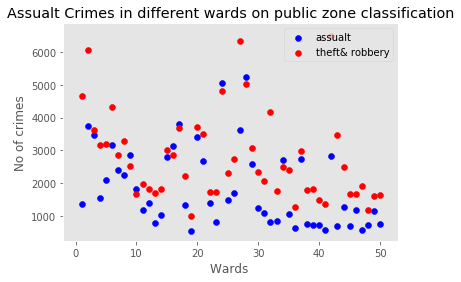

In [42]:
#comparing theft and robbery in public classification
plt.scatter(df_assualt["ward"],df_assualt["assualt"],marker="o",color="blue")
plt.scatter(df_theftrob["ward"],df_theftrob["theft& robbery"],marker="o",color="red")


plt.title("Assualt Crimes in different wards on public zone classification")
plt.xlabel("Wards ")
plt.ylabel("No of crimes")

plt.legend()
plt.grid()
plt.savefig("Images/chartsConfig.png")


In [43]:
# Comparison of Theft and Assualt on Public and Residential Area

assualt_public=crimes_data_df[(crimes_data_df["Primary Type"]=="ASSAULT") &(crimes_data_df["Location Description"]=="PUBLIC")]

assualt_residential=crimes_data_df[(crimes_data_df["Primary Type"]=="ASSAULT") &(crimes_data_df["Location Description"]=="RESIDENTIAL")]


In [44]:
year_count=assualt_public['Year'].value_counts()

year_counts=assualt_residential['Year'].value_counts()



year_count=pd.DataFrame(year_count)
year_counts=pd.DataFrame(year_counts)


year_count=year_count.reset_index()
year_counts=year_counts.reset_index()

year_count.rename(columns={"index":"year","Year":"cr_public"}, inplace=True)
year_counts.rename(columns={"index":"year","Year":"cr_resident"}, inplace=True)


year_count=year_count.sort_values(['year'], ascending=True)
year_counts=year_counts.sort_values(['year'], ascending=True)



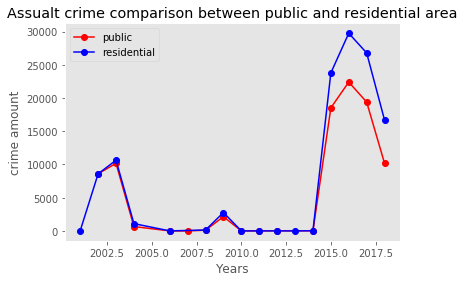

In [45]:
plt.grid()

assualt_onpublic=plt.plot(year_count["year"],year_count["cr_public"],marker="o",color="red",label="public")
plt.legend(loc="best")


assualt_onreside=plt.plot(year_counts["year"],year_counts["cr_resident"],marker="o",color="blue",label="residential")
plt.legend(loc="best")

plt.title("Assualt crime comparison between public and residential area")
plt.xlabel("Years")
plt.ylabel ("crime amount")
plt.savefig("Images/chartsConfig.png")

# Assualt is higher in residential areas

In [46]:
# A comparison of theft and robbery in and around public and residential areas


theft_public=crimes_data_df[(crimes_data_df["Primary Type"]=="THEFT & ROBBERY") &(crimes_data_df["Location Description"]=="PUBLIC")]

theft_residential=crimes_data_df[(crimes_data_df["Primary Type"]=="THEFT & ROBBERY") &(crimes_data_df["Location Description"]=="RESIDENTIAL")]



In [47]:
year_count=theft_public['Year'].value_counts()

year_counts=theft_residential['Year'].value_counts()



year_count=pd.DataFrame(year_count)
year_counts=pd.DataFrame(year_counts)


year_count=year_count.reset_index()
year_counts=year_counts.reset_index()

year_count.rename(columns={"index":"year","Year":"tf_public"}, inplace=True)
year_counts.rename(columns={"index":"year","Year":"tf_resident"}, inplace=True)


year_count=year_count.sort_values(['year'], ascending=True)
year_counts=year_counts.sort_values(['year'], ascending=True)


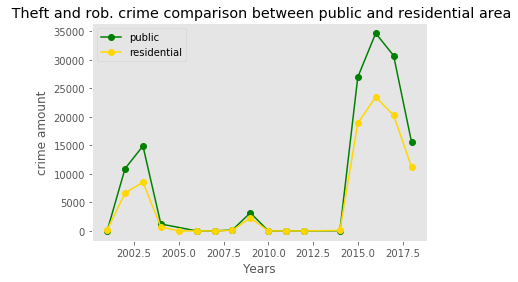

In [48]:
plt.grid()

theft_onpublic=plt.plot(year_count["year"],year_count["tf_public"],marker="o",color="green",label="public")
plt.legend(loc="best")


theft_onreside=plt.plot(year_counts["year"],year_counts["tf_resident"],marker="o",color="gold",label="residential")
plt.legend(loc="best")

plt.title(" Theft and rob. crime comparison between public and residential area")
plt.xlabel("Years")
plt.ylabel ("crime amount")
plt.savefig("Images/chartsConfig.png")

# Robbery and theft is higher in public designated areas

In [49]:
# Comparison of Theft and Assualt on Public and Residential Area

theft_public=crimes_data_df[(crimes_data_df["Primary Type"]=="THEFT & ROBBERY") &(crimes_data_df["Location Description"]=="PUBLIC")]

theft_residential=crimes_data_df[(crimes_data_df["Primary Type"]=="THEFT & ROBBERY") &(crimes_data_df["Location Description"]=="RESIDENTIAL")]


In [50]:
df_theft_public=theft_public['Ward'].value_counts()

df_theft_residential=theft_residential['Ward'].value_counts()

df_theft_public=pd.DataFrame(df_theft_public)

df_theft_residential=pd.DataFrame(df_theft_residential)

df_theft_public=df_theft_public.reset_index().rename(columns={"index":"wards","Ward":"crime count"})

df_theft_residential=df_theft_residential.reset_index().rename(columns={"index":"wards","Ward":"crime count"})



In [51]:
df_theft_public_sorted=df_theft_public.sort_values(["wards"],ascending=True)

df_theft_residential_sorted=df_theft_residential.sort_values(["wards"],ascending=True)



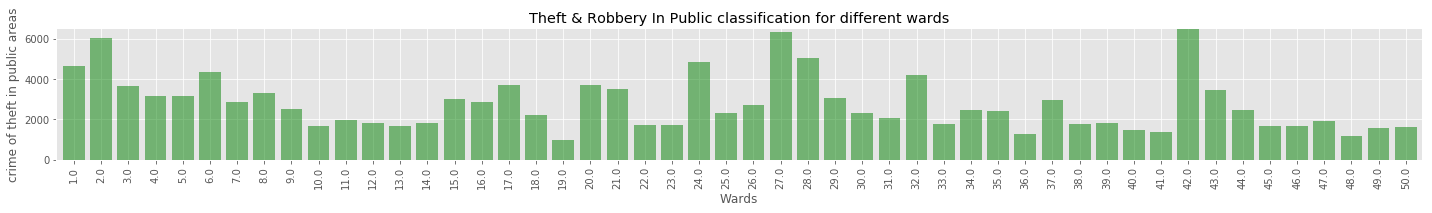

In [52]:
x_axis=np.arange(len(df_theft_public_sorted))
tick_locations=[value+0.4 for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(x_axis,df_theft_public_sorted["crime count"],color="g",alpha=0.5, align="edge")
plt.xticks(tick_locations,df_theft_public_sorted["wards"],rotation="vertical")
plt.xlim(-0.25, len(df_theft_public_sorted))
plt.ylim(0, max(df_theft_public_sorted["crime count"])+10)
plt.title("Theft & Robbery In Public classification for different wards")
plt.xlabel("Wards")
plt.ylabel("crime of theft in public areas")
plt.tight_layout()
plt.savefig("Images/chartsConfig.png")

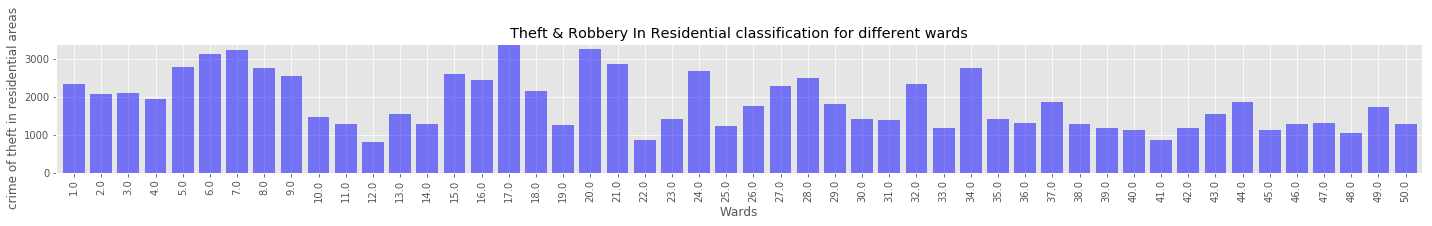

In [53]:
x_axis=np.arange(len(df_theft_residential_sorted))
tick_locations=[value+0.4 for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(x_axis,df_theft_residential_sorted["crime count"],color="b",alpha=0.5, align="edge")
plt.xticks(tick_locations,df_theft_residential_sorted["wards"],rotation="vertical")
plt.xlim(-0.25, len(df_theft_residential_sorted))
plt.ylim(0, max(df_theft_residential_sorted["crime count"])+10)
plt.title("Theft & Robbery In Residential classification for different wards")
plt.xlabel("Wards")
plt.ylabel("crime of theft in residential areas")
plt.tight_layout()
plt.savefig("Images/chartsConfig.png")

Above shows a comparison between Residential for the crimes of theft and robbery

Below shows deadly assualt crimes on residential areas on maps of chicago on the year 2016-2017

In [54]:
assualt_residential=crimes_data_df[(crimes_data_df["Primary Type"]=="ASSAULT") &(crimes_data_df["Location Description"]=="RESIDENTIAL")]

In [55]:
crime_assualt_residential=assualt_residential.loc[assualt_residential['Year'].isin(['2016','2017'])]
crime_assualt_residential

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
126693,10929491,JA244606,4/29/17 23:38,028XX W 21ST PL,496,ASSAULT,AGGRAVATED DOMESTIC BATTERY: KNIFE/CUTTING INST,RESIDENTIAL,True,False,...,12.0,30.0,04B,1157704.0,1889592.0,2017,2/12/18 15:46,41.852796,-87.696662,"(41.852796034, -87.696662196)"
196370,10364686,HZ100059,1/1/16 1:00,020XX N KARLOV AVE,486,ASSAULT,DOMESTIC BATTERY SIMPLE,RESIDENTIAL,False,True,...,30.0,20.0,08B,1148719.0,1913304.0,2016,2/10/18 15:50,41.918042,-87.729027,"(41.918042456, -87.729027375)"
196375,10364693,HZ100039,1/1/16 0:30,024XX W FARGO AVE,486,ASSAULT,DOMESTIC BATTERY SIMPLE,RESIDENTIAL,False,False,...,50.0,2.0,08B,1158878.0,1949369.0,2016,2/10/18 15:50,42.016804,-87.690709,"(42.016804165, -87.690708662)"
196378,10364696,HZ100115,1/1/16 2:10,078XX S ESSEX AVE,486,ASSAULT,DOMESTIC BATTERY SIMPLE,RESIDENTIAL,False,True,...,7.0,43.0,08B,1194218.0,1853541.0,2016,2/10/18 15:50,41.753049,-87.563831,"(41.753049024, -87.563831077)"
196382,10364702,HZ100088,1/1/16 0:30,071XX S YALE AVE,486,ASSAULT,DOMESTIC BATTERY SIMPLE,RESIDENTIAL,False,True,...,6.0,69.0,08B,1175860.0,1857602.0,2016,2/10/18 15:50,41.764624,-87.630984,"(41.764623758, -87.630983877)"
196383,10364703,HZ100060,1/1/16 1:06,058XX S TRUMBULL AVE,051A,ASSAULT,AGGRAVATED: HANDGUN,RESIDENTIAL,False,False,...,14.0,63.0,04A,1154381.0,1865602.0,2016,2/10/18 15:50,41.787031,-87.709498,"(41.787031282, -87.709498)"
196386,10364706,HZ100097,1/1/16 1:35,069XX S ROCKWELL ST,460,ASSAULT,SIMPLE,RESIDENTIAL,False,False,...,18.0,66.0,08B,1160239.0,1858543.0,2016,2/10/18 15:50,41.767542,-87.688213,"(41.767541748, -87.688213376)"
196387,10364707,HZ100076,1/1/16 1:16,007XX S CALIFORNIA AVE,486,ASSAULT,DOMESTIC BATTERY SIMPLE,RESIDENTIAL,True,True,...,2.0,27.0,08B,1157822.0,1896474.0,2016,2/10/18 15:50,41.871679,-87.696042,"(41.871678559, -87.696041597)"
196391,10364714,HZ100022,1/1/16 0:14,036XX W 18TH ST,454,ASSAULT,AGG PO HANDS NO/MIN INJURY,RESIDENTIAL,True,False,...,24.0,29.0,08B,1152095.0,1891128.0,2016,2/10/18 15:50,41.857123,-87.717209,"(41.857123277, -87.717208677)"
196401,10364728,HZ100091,1/1/16 1:30,053XX N KEDZIE AVE,486,ASSAULT,DOMESTIC BATTERY SIMPLE,RESIDENTIAL,True,False,...,40.0,13.0,08B,1154082.0,1935214.0,2016,2/10/18 15:50,41.978060,-87.708737,"(41.978059641, -87.708736676)"


In [56]:
# Store latitude and longitude in locations
locations = assualt_residential[["Latitude","Longitude"]]                             
# Drop all rows with missing informationl
locations = locations.dropna(how='any')
locations = locations.reset_index(drop=True)

In [58]:
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, max_intensity=48,
                                 point_radius = 2.1)
fig.add_layer(heat_layer)


plt.savefig("Images/chartsConfig.png")
fig

Figure(layout=FigureLayout(height='420px'))

<Figure size 432x288 with 0 Axes>

# residential areas where assault crimes are higher